## Import all necessary library

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import os
import requests
import tweepy
import json
from PIL import Image
from io import BytesIO
import re

## Gather necessary files and data

In [2]:
#Import twitter-archive-enhanced.csv as a DataFrame
tweets = pd.read_csv('twitter-archive-enhanced.csv')

In [31]:
#Request image-predictions.tsv and save it:
I = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', 'wb') as ip:
    for chunk in I.content:
        ip.write(chunk)

In [3]:
#Load image-predictions.tsv as DataFrame
images = pd.read_csv('image-predictions.tsv', sep = '\t')

In [4]:
#create consumer key, consumer secret, acess token, and acess token secret:
CONSUMER_KEY = 'XlYvH5KDVVmNNzSkuRtHiqeO7'
CONSUMER_SECRET = '1Cigs4Pc9GFsNy3W9osqupWDRPML6enmY2Kc2R3E2KSrS7iLV1'
ACCESS_TOKEN = '775734875747868673-57mC2Z0p9BLukr5NYhuo8rhxF2Ex4fq'
ACCESS_TOKEN_SECRET = 'FBSoHhZtJXcv58HhpclaPcFDyAF6njV7kWh55s6KUoRuc'

In [142]:
#authorize tweepy
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

In [18]:
#extract tweet information into dictionary
tweet_list = []
list_id = list(tweets['tweet_id'])
for ids in list_id:
    try:
        tweet = api.get_status(ids, tweet_mode='extended')
        tweet_id = tweet._json['id']
        retweet_count = int(tweet._json['retweet_count'])
        favorite_count = int(tweet._json['favorite_count'])
        media_type = tweet._json['entities']['media'][0]['type']
    except tweepy.TweepError:
        tweet_id = long(ids) #have a problem with Json Seriability so have to change type
        retweet_count = np.nan
        favorite_count = np.nan
        media_type = np.nan
    except KeyError:   
        media_type = np.nan     
    tweet_list.append({'tweet_id': tweet_id,
                       'media_type': media_type,
                       'retweet_count': retweet_count,
                       'favorite_count': favorite_count})

In [19]:
#convert dictionary into json text file
with open('tweet_json.txt', 'w') as file:  
    json.dump(tweet_list, file)

In [5]:
#load json text file and turn it into Data Frame
with open('tweet_json.txt') as json_file:  
    tweet_status = json.load(json_file)
    tweet_status = pd.DataFrame(tweet_status)

## Assess data

### Asses twitter-archive-enhanced.csv as tweets DataFrame

In [7]:
tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [52]:
tweets['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Toby           7
Bailey         7
Buddy          7
an             7
Stanley        6
Koda           6
Scout          6
Jax            6
Dave           6
Leo            6
Bella          6
Jack           6
Milo           6
Rusty          6
Oscar          6
Gus            5
            ... 
Tove           1
Glacier        1
Pip            1
Zoe            1
Cilantro       1
Jennifur       1
Olaf           1
Teddy          1
Socks          1
Snoop          1
Lenox          1
Jeremy         1
Zooey          1
Todo           1
Kanu           1
Ember          1
Steve          1
Laika          1
Eazy           1
Obi            1
Kane           1
Finnegus       1
Alexander      1
Meatball       1
Zara           1
Bronte         1
Edgar          1
Glenn         

In [53]:
tweets['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [10]:
len(tweets[tweets['rating_denominator'] !=10])

23

In [155]:
tweets_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1947
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

- there are 4 different of type of source or utility used to share the posts: Twitter for iPhone, Vine, Twitter Web Client, and TweetDeck.

### Asses twitter-archive-enhanced.csv as tweets DataFrame

#### Asess images dataframe

In [11]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [234]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [242]:
images[(images['p1_dog'] == False) & (images['p3_dog'] == True)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
126,668256321989451776,https://pbs.twimg.com/media/CUYflCXWEAAzQVu.jpg,1,canoe,0.407683,False,paddle,0.115550,False,Pembroke,0.094429,True
131,668297328638447616,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,1,king_penguin,0.606747,False,ice_bear,0.264221,False,Eskimo_dog,0.032784,True
133,668480044826800133,https://pbs.twimg.com/media/CUbrDWOWcAEyMdM.jpg,1,Arctic_fox,0.119243,False,Labrador_retriever,0.099965,True,pug,0.086717,True


In [111]:
images['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [21]:
tweet_status

,favorite_count,media_type,retweet_count,tweet_id
0,38732.0,photo,8571.0,892420643555336193
1,33195.0,photo,6300.0,892177421306343426
2,24997.0,photo,4184.0,891815181378084864
3,42135.0,photo,8691.0,891689557279858688
4,40278.0,photo,9460.0,891327558926688256
5,20188.0,photo,3132.0,891087950875897856
6,11831.0,photo,2087.0,890971913173991426
7,65429.0,photo,19011.0,890729181411237888
8,27751.0,photo,4287.0,890609185150312448
9,31902.0,photo,7459.0,890240255349198849


In [22]:
tweet_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
favorite_count    890 non-null float64
media_type        729 non-null object
retweet_count     890 non-null float64
tweet_id          2356 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 73.7+ KB


In [40]:
tweet_status['media_type'].value_counts()

photo    729
Name: media_type, dtype: int64

In [41]:
tweet_status[tweet_status['media_type'] != 'photo']

,favorite_count,media_type,retweet_count,tweet_id
19,NaN,NaN,NaN,888202515573088257
30,116.0,NaN,4.0,886267009285017600
32,0.0,NaN,104.0,886054160059072513
35,20399.0,NaN,3779.0,885518971528720385
42,72940.0,NaN,20566.0,884247878851493888
55,128.0,NaN,7.0,881633300179243008
64,311.0,NaN,10.0,879674319642796034
68,0.0,NaN,6902.0,879130579576475649
72,30257.0,NaN,7299.0,878604707211726852
73,0.0,NaN,1308.0,878404777348136964


In [17]:
tweet_status[tweet_status['retweet_count'].isnull()]

,favorite_count,media_type,retweet_count,tweet_id
19,NaN,photo,NaN,888202515573088257
95,NaN,photo,NaN,873697596434513921
118,NaN,photo,NaN,869988702071779329
132,NaN,photo,NaN,866816280283807744
155,NaN,photo,NaN,861769973181624320
247,NaN,photo,NaN,845459076796616705
260,NaN,photo,NaN,842892208864923648
298,NaN,photo,NaN,837012587749474308
382,NaN,photo,NaN,827228250799742977
566,NaN,photo,NaN,802247111496568832


#### Quality:
##### `tweets` table
- time stamp should be DateTime type
- source should show what utility used to post the Tweet rather than the html
- the data should only contain original posts and no retweets
- some of the dogs' names are not accurate such as: a, the, an, not, such, very, O, my, getting, all, his, infuriating, by, officially, life, space, one, mad, old
- 23 ratings have a rating denominator different than 10
##### `images` table
- p1, p2, p3 needs to be a dog breed
- p1_dog, p2_dog and p3_dog don't agree with each other in some cases. Need to decide if what type of dogs was in the picture.
##### `tweet_status` table
- 162 posts don't have photo with their media_type is not photo. I have to clean it because one of the criteria is that the post has to have photos.
- 1467 posts were deleted so I couldn't collect their favorite and retweet_counts. So I will have to delete them from the data frame.
#### Tidiness
- doggo, floofer, pupper, puppo should be combine into one column in `tweets` table
- p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, jpg_url, and img_num needs to have more descriptive column names in `images` table
- p1, p2, p3 needs to have the same string format (with no _ between two words) in `images` table
- tweet_id is repeated in all three tables
- `tweet_status` table and `images` table should be combined with `tweets` table

## Clean

In [6]:
#make copy of the original data frame:
tweets_clean = tweets.copy()
images_clean = images.copy()
status_clean = tweet_status.copy()

### Issue: time stamp should be DateTime type

#### Define
- change timestamp to date time type by using to_datetime in pandas

#### Code

In [7]:
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean['timestamp'])

#### Test

In [8]:
tweets_clean['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Issue: 23 ratings have a rating denominator different than 10

### Define
- I will remove them from the data frame using conditional method

#### Code

In [9]:
tweets_clean = tweets_clean[tweets_clean['rating_denominator'] == 10]

#### Test

In [10]:
tweets_clean[tweets_clean['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue: the data should only contain original posts and no retweets

#### Define:
- remove retweet posts from the data set by only selecting posts with retweeted_status_id is null
- remove reply posts from the data set by only selecting posts with in_reply_to_status_id is null

#### Code

In [11]:
tweets_clean = tweets_clean[tweets_clean['retweeted_status_id'].isnull()]
tweets_clean = tweets_clean[tweets_clean['in_reply_to_status_id'].isnull()]

#### Test

In [12]:
tweets_clean[tweets_clean['retweeted_status_user_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [13]:
tweets_clean[tweets_clean['in_reply_to_user_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns are irrelevant

#### Define
- Use drop() to remove in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp because they are not needed

#### Code

In [14]:
tweets_clean = tweets_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Test

In [15]:
tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue: source should show what utility used to post the Tweet rather than the html

#### Define:
- make a function to chnage source from html to the the string of actual source such as Twitter for iPhone, Vine-Make a Scene, Twitter Web Client or TweetDeck

#### Code

In [16]:
def source(html):
    if html == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        html = 'Twitter for iPhone'
        return html
    elif html == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
        html = 'Vine - Make a Scene'
        return html
    elif html == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
        html = 'Twitter Web Client'
        return html
    elif html == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':
        html = 'TweetDeck'
        return html
tweets_clean['source'] = tweets_clean['source'].apply(source)

#### Test

In [17]:
tweets_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue: doggo, floofer, pupper, puppo should be combine into one column in `tweets` table

#### Define
- use melt to combine those three columns as one

#### Code

In [62]:
tweets_clean['text'][1063]

'This is Cooper. He basks in the glory of rebellion. 9/10 probably a preteen https://t.co/kDamUfeIpm'

In [19]:
stage_dog = tweets_clean.filter(['tweet_id','doggo', 'floofer', 'pupper', 'puppo'])
doggo = stage_dog[stage_dog['doggo']=='doggo'].filter(['tweet_id','doggo']).rename(index=str, columns ={"doggo": "stages_of_dog"})
floofer = stage_dog[stage_dog['floofer']=='floofer'].filter(['tweet_id','floofer']).rename(index=str, columns ={"floofer": "stages_of_dog"})
pupper = stage_dog[stage_dog['pupper']=='pupper'].filter(['tweet_id','pupper']).rename(index=str, columns ={"pupper": "stages_of_dog"})
puppo = stage_dog[stage_dog['puppo']=='puppo'].filter(['tweet_id','puppo']).rename(index=str, columns ={"puppo": "stages_of_dog"})
stage_dog = pd.concat([doggo, pupper, puppo, floofer], ignore_index=True)

In [20]:
#Check for duplication
stage_dog[stage_dog['tweet_id'].duplicated()]

,tweet_id,stages_of_dog
103,817777686764523521,pupper
108,808106460588765185,pupper
111,801115127852503040,pupper
116,785639753186217984,pupper
117,781308096455073793,pupper
128,759793422261743616,pupper
132,751583847268179968,pupper
146,741067306818797568,pupper
153,733109485275860992,pupper
319,855851453814013952,puppo


##### 11 duplicated tweet_id
- for tweet_id = 817777686764523521, the stages of dog is pupper, not doggo. So I will delete the doggo row, which has index of 32
- for tweet_id = 808106460588765185, there are two dogs and they are doggo and pupper. So I will combine update stages of dog at index 37 to doggo and pupper and delete one with index of 108
- for tweet_id = 801115127852503040, the stages of dog is pupper, not doggo. So I will delete the doggo row, which has index of 38
- for tweet_id = 785639753186217984, it's not a dog rating, but a porcupine. So I will delete it from both stage_dog data frame and tweets_clean. Index for stage_dog are 44 and 116
- for tweet_id = 781308096455073793, there are two dogs and they are doggo and pupper. So I will combine update stages of dog at index 47 to doggo and pupper and delete one with index of 117
- for tweet_id = 759793422261743616, there are two dogs and they are doggo and pupper. So I will combine update stages of dog at index 57 to doggo and pupper and delete one with index of 128
- for tweet_id = 751583847268179968, the stages of dog is a doggo, not pupper. So I will delete the pupper row, which has index of 132
- for tweet_id = 741067306818797568	, there are two dogs and they are doggo and pupper. So I will combine update stages of dog at index 73 to doggo and pupper and delete one with index of 146
- for tweet_id = 733109485275860992, there are two dogs and they are doggo and pupper. So I will combine update stages of dog at index 77 to doggo and pupper and delete one with index of 153
- for tweet_id = 855851453814013952, the stages of dog is puppo, not doggo. So I will delete the doggo row, which has index of 7
- for tweet_id = 8540101725529497602, the stages of dog is doggo, not floofer. So I will delete the floofer row, which has index of 338

In [21]:
#clean the duplicated in stage_dog
stage_dog = stage_dog.drop([7,32,38,44,108,116,117,128,132,146,153,338], axis=0)
#test to see if there is no duplicated
stage_dog[stage_dog['tweet_id'].duplicated()]

,tweet_id,stages_of_dog


In [22]:
stage_dog['stages_of_dog'][37]= 'doggo & pupper'
stage_dog['stages_of_dog'][47]= 'doggo & pupper'
stage_dog['stages_of_dog'][57]= 'doggo & pupper'
stage_dog['stages_of_dog'][73]= 'doggo & pupper'
stage_dog['stages_of_dog'][77]= 'doggo & pupper'

C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Linh\Anaconda

In [23]:
#test
stage_dog[stage_dog['stages_of_dog']== 'doggo & pupper']

,tweet_id,stages_of_dog
37,808106460588765185,doggo & pupper
47,781655249211752448,doggo & pupper
57,759793422261743616,doggo & pupper
73,741067306818797568,doggo & pupper
77,733109485275860992,doggo & pupper


In [24]:
tweets_clean = pd.merge(tweets_clean, stage_dog, on=['tweet_id'], how='left')
#delete doggo, pupper, puppo, floofer columns
tweets_clean = tweets_clean.drop(['doggo','pupper', 'puppo','floofer'], axis=1)

- index of the porcupine in tweets_clean is 534 and the tweet_id is 785639753186217984

In [25]:
tweets_clean= tweets_clean.drop([534], axis = 0)

In [26]:
#Test
tweets_clean[tweets_clean['tweet_id']==785639753186217984]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog


### Issue: some of the dogs' names are not accurate such as: a, the, an, not, such, very, O, my, getting, all, his, infuriating, by, officially, life, space, one, mad, old

#### Define:
- I can extract the name from the text by filter the text that contains the word "name" or "named". From there, I split the texts at "name is " or "named" and then split the word at "." and white space again to get the name.
- looking through the inaccurate dogs'name, the names look like they were word extracted programmitically after "this is" or "here is"

In [27]:
name = list(tweets_clean['name'])
text = list(tweets_clean['text'])

#### Code

In [28]:
named = tweets_clean[tweets_clean['text'].apply(lambda x: 'named' in x)]
named['name'] = named['text'].str.split('named ', expand = True)[1]
named['name'] = named['name'].str.split('.', expand = True)[0]
index_named = named.index.get_values()
for i in index_named:
    tweets_clean['name'][i] = named['name'][i]

C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

In [29]:
name = tweets_clean[tweets_clean['text'].apply(lambda x: 'name is' in x)]
name['name'] = name['text'].str.split('name is ', expand = True)[1]
name['name'] = name['name'].str.split('.', expand = True)[0]
name['name'] = name['name'].str.split(' ', expand = True)[0]
index_name = name.index.get_values()
for i in index_name:
    tweets_clean['name'][i] = name['name'][i]
tweets_clean['name'][1993] = 'Big Jumpy Rat'

C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

- index 1993 should be Big Jumpy Rat

#### Test

In [30]:
tweets_clean[tweets_clean['text'].apply(lambda x: 'name is' in x)]['name']

32             Howard
140              Zoey
655              Zoey
1427             Thea
1482       Sabertooth
1993    Big Jumpy Rat
2013            Daryl
2038            Rocky
Name: name, dtype: object

In [31]:
tweets_clean[tweets_clean['text'].apply(lambda x: 'named' in x)]['name']

1594            Wylie
1688              Kip
1767    Jacob (Yacōb)
1797            Rufus
1847            Spork
1856         Cherokee
1859            Hemry
1877          Alphred
1891          Alfredo
1896             Zeus
1919            Leroi
1932            Berta
1946             Chuk
1955             Guss
1963          Alfonso
1977           Cheryl
1983          Jessiga
1990            Klint
1995          Tickles
1999             Kohl
2029             Pepe
2036        Octaviath
2039             Johm
Name: name, dtype: object

#### Define
- use filter to choose all dogs' name as 'a'
- use split to find out what are the words after the words "there is" or "here is"
- if the word is a name, I will record it and change them accordingly
- if not, I will change the name to None

In [32]:
# check name == 'a'
a = tweets_clean[(tweets_clean['name'] == 'a')]['text'].str.lower()
a.str.split('is ', expand = True)

,0,1,2,3,4
51,here,a pupper approaching maximum borkdrive. zoomin...,None,None,None
492,here,a perfect example of someone who has their pri...,None,None,None
614,guys th,,getting so out of hand. we only rate dogs. th,,a galapagos speed panda. pls only send dogs......
790,th,,a mighty rare blue-tailed hammer sherk. human ...,None,None
792,viewer discretion,advised. th,,a terrible attack in progress. not even in wat...,None
802,th,,a carrot. we only rate dogs. please only send ...,by now ...11/10 https://t.co/9e48aprbm2,None
831,th,,a very rare great alaskan bush pupper. hard to...,None,None
970,people please. th,,a deadly mediterranean plop t-rex. we only rat...,None,None
983,th,,a taco. we only rate dogs. please only send in...,None,None
1109,here,a heartbreaking scene of an incredible pupper ...,None,None,None


- all doesn't contain a name of a dog so I will change them to None
#### Code

In [33]:
def a_name(name):
    if name == 'a':
        name = 'None'
    return name
tweets_clean['name']=tweets_clean['name'].apply(a_name)

#### Test 

In [34]:
tweets_clean[(tweets_clean['name'] == 'a')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog


#### Define
- use filter to choose all dogs' name as the, an, not, such, very, O, my, getting, all, his, infuriating, by, officially, life, space, one, mad
- use split to find out what are the words after the words "there is" or "here is"
- if the word is a name, I will record it and change them accordingly
- if not, I will change the name to None

#### Code

In [35]:
an = tweets_clean[(tweets_clean['name'] == 'an')|(tweets_clean['name'] == 'the')|(tweets_clean['name'] == 'such')|(tweets_clean['name'] == 'very')]['text'].str.lower()
an.str.split('is ', expand = True)

,0,1,2,3
21,i've yet to rate a venezuelan hover wiener. th,,such an honor. 14/10 paw-inspiring af (ig: rox...,None
629,we only rate dogs. pls stop sending in non-can...,arctic floof kangaroo. th,,very frustrating. 11/10 https://t.co/qludupoe3d
808,th,,an iraqi speed kangaroo. it,not a dog. please only send in dogs. i'm very ...
814,we only rate dogs. pls stop sending in non-can...,jamaican flop seal. th,,very very frustrating. 9/10 https://t.co/nc53z...
877,we only rate dogs. please stop sending in non-...,alaskan flop turtle. th,,very frustrating. 10/10 https://t.co/qxtek6atxc
1128,th,,an east african chalupa seal. we only rate dog...,None
1151,we only rate dogs. pls stop sending in non-can...,mongolian grass snake. th,,very frustrating. 11/10 https://t.co/22x9sbcycu
1284,stop sending in lobsters. th,,the final warning. we only rate dogs. thank yo...,None
1359,th,,the newly formed pupper a capella group. they'...,None
1543,th,,the happiest pupper i've ever seen. 10/10 woul...,None


- all doesn't contain a name of a dog so I will change all 'an', 'such', 'the', 'very' to 'None'

In [36]:
an = tweets_clean[(tweets_clean['name'] == 'O')|(tweets_clean['name'] == 'my')|(tweets_clean['name'] == 'his')|(tweets_clean['name'] == 'getting')|(tweets_clean['name'] == 'all')|(tweets_clean['name'] == 'infuriating')|(tweets_clean['name'] == 'by')|(tweets_clean['name'] == 'officially')|(tweets_clean['name'] == 'life')|(tweets_clean['name'] == 'space')|(tweets_clean['name'] == 'one')|(tweets_clean['name'] == 'mad')|(tweets_clean['name'] == 'old')]['text'].str.lower()
an.str.split('is ', expand = True)

,0,1,2,3,4,5
289,"occasionally, we're sent fantastic stories. th",,one of them. 14/10 for grace https://t.co/bz4a...,None,None,None
592,th,,o'malley. that,how he sleeps. doesn't care what you think abo...,None,None
717,th,,one of the most inspirational stories i've eve...,None,None,None
780,that,quizno. th,,h,beach. he does not tolerate human shenanigans ...,beach. 10/10 reclaim ur land doggo https://t.c...
781,th,,one of the most reckless puppers i've ever see...,beyond me. 6/10 https://t.co/z5badtn9kd,None,None
852,th,,getting incredibly frustrating. th,,a mexican golden beaver. we only rate dogs. on...,None
875,say hello to mad pupper. you know what you did...,None,None,None,None,None
916,th,,all i want in my life. 12/10 for super sleepy ...,None,None,None
982,th,,old now but it's absolutely heckin fantastic a...,None,None,None
1032,we 👏🏻 only 👏🏻 rate 👏🏻 dogs. pls stop sen...,dutch panda worm. th,,infuriating. 11/10 https://t.co/odflzbong2,None,None


- for the name with index of 592 and 780, they could be names so I will check the texts later and if they are name, I will change them to the according name.
- the rest doesn't contain real names so I will change all of them to None.

In [37]:
tweets_clean['text'][592]

"This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC"

- the name for index 592 is O'Malley so I will change it to O'Malley

In [38]:
tweets_clean['text'][780]

'That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7'

In [39]:
tweets_clean['text'][592] = "O'Malley"
tweets_clean['text'][780] = 'Quizno'

C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Linh\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
the, an, not, such, very, O, my, getting, all, his, infuriating, by, officially, life, space, one, mad

SyntaxError: invalid syntax (<ipython-input-40-c8b3400d0a1c>, line 1)

In [41]:
def rename(name):
    if (name == 'an') or (name == 'the') or (name == 'not') or (name == 'such') or (name == 'very') or (name == 'my') or (name == 'getting') or (name == 'all') or (name == 'his') or (name == 'infuriating') or (name == 'by') or (name == 'officially') or (name == 'life') or (name == 'space') or (name == 'one') or (name == 'mad') or (name == 'old'):
        name = 'None'
    return name
tweets_clean['name']=tweets_clean['name'].apply(rename)

#### Test

In [42]:
tweets_clean[(tweets_clean['name'] == 'my')|(tweets_clean['name'] == 'his')|(tweets_clean['name'] == 'getting')|(tweets_clean['name'] == 'all')|(tweets_clean['name'] == 'infuriating')|(tweets_clean['name'] == 'by')|(tweets_clean['name'] == 'officially')|(tweets_clean['name'] == 'life')|(tweets_clean['name'] == 'space')|(tweets_clean['name'] == 'one')|(tweets_clean['name'] == 'mad')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog


In [43]:
tweets_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Howard', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey

### Issue : p1, p2, p3 needs to be a dog breed

#### Define
- detect if the prediction is actually a dog breed and not other things by making sure that either p1_dog, p2_dog, or p3_dog is True.
- if not a dog breed then, I will delete it from the data set.

#### Code

In [44]:
images_clean = images_clean[(images_clean['p1_dog'] == True) | (images_clean['p2_dog'] == True) | (images_clean['p3_dog'] == True)]

#### Test

In [45]:
images_clean[(images_clean['p1_dog'] == False) & (images_clean['p2_dog'] == False) & (images_clean['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue : decide on the dog breed for the picture and make the column names to be more descriptive instead of p1, p1_conf, p1_dog, etc

#### Define
- create a new data frame when p1_dog is True with p1 and p2_conf as the prediction and confidence level
- create another new data fram if p1_dog is false and p2_dog is true and use p2 and p2_conf as prediction and confidence level
- create another new data fram if both p1_dog and p2_dog are fase and use p3 and p3_conf as prediction and confidence level
- at the same time, I will change the columns name to image_url, image_numbers, dog_breed_prediction, confidence_level to be more descriptive

#### Code

In [46]:
p1 = images_clean[(images_clean['p1_dog'] == True)]
p1 = p1.drop(['p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)
p1 = p1.rename(index=str, columns ={"jp_url": " image_url", "img_num": "image_number", "p1": "dog_breed_prediction", "p1_conf": "confidence_level"})
p2 = images_clean[(images_clean['p1_dog'] == False) & (images_clean['p2_dog'] == True)]
p2 = p2.drop(['p2_dog', 'p1', 'p1_conf', 'p1_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)
p2 = p2.rename(index=str, columns ={"jp_url": " image_url", "img_num": "image_number", "p2": "dog_breed_prediction", "p2_conf": "confidence_level"})
p3 = images_clean[(images_clean['p1_dog'] == False) & (images_clean['p2_dog'] == False)]
p3 = p3.drop(['p3_dog', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog'], axis = 1)
p3 = p3.rename(index=str, columns ={"jp_url": " image_url", "img_num": "image_number", "p3": "dog_breed_prediction", "p3_conf": "confidence_level"})
images_clean = pd.concat([p1,p2,p3])

#### Test

In [47]:
images_clean.head()

,tweet_id,jpg_url,image_number,dog_breed_prediction,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


### Issue: in dog_breed_ prediction, the string has _ between words instead of blank space

#### Define
- I will replace the _ with white space in the string using str.replace() method

#### Code

In [48]:
images_clean['dog_breed_prediction'] = images_clean['dog_breed_prediction'].str.replace('_', ' ')
images_clean['dog_breed_prediction'] = images_clean['dog_breed_prediction'].str.replace('-', ' ')

#### Test

In [49]:
images_clean['dog_breed_prediction'].head(10)

0     Welsh springer spaniel
1                    redbone
2            German shepherd
3        Rhodesian ridgeback
4         miniature pinscher
5       Bernese mountain dog
7                       chow
9           miniature poodle
10          golden retriever
11             Gordon setter
Name: dog_breed_prediction, dtype: object

### Combining `tweets_clean`, `images_clean`, and `status_clean` table

#### Define:
- use merge to combine `tweets_clean`, `images_clean`, and `status_clean` table on tweets_id and by 'left' method

#### Code

In [50]:
twitter_archive_enhanced = pd.merge(tweets_clean, images_clean, on=['tweet_id'], how='left')
twitter_archive_enhanced = pd.merge(twitter_archive_enhanced, status_clean, on=['tweet_id'], how='left')

#### Test

In [51]:
twitter_archive_enhanced.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog,jpg_url,image_number,dog_breed_prediction,confidence_level,favorite_count,media_type,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN,38732.0,photo,8571.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,33195.0,photo,6300.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,24997.0,photo,4184.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador retriever,0.168086,42135.0,photo,8691.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,40278.0,photo,9460.0


### Issue : Missing Data for retweet counts and favorite counts

#### Define
- I will delete the 1467 posts that I couldn't collect the data for favorite counts and retweet counts

#### Code

In [52]:
twitter_archive_enhanced = twitter_archive_enhanced[twitter_archive_enhanced['retweet_count'].notnull()]

#### Test

In [53]:
twitter_archive_enhanced[twitter_archive_enhanced['retweet_count'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog,jpg_url,image_number,dog_breed_prediction,confidence_level,favorite_count,media_type,retweet_count


In [54]:
twitter_archive_enhanced[twitter_archive_enhanced['favorite_count'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog,jpg_url,image_number,dog_breed_prediction,confidence_level,favorite_count,media_type,retweet_count


### Issue 2: Media type is not photo in some posts

#### Define
- For the posts with Vine as source, the media_type should be videos. I will remove them from the data frame because they are not images
- decide if the classifaction is right or not. create a list of media type that is NaN and compare them to the tweet_id in images data frame. 
- if there is no photo or video in those posts, I will delete them from the data frame

#### Code

In [55]:
twitter_archive_enhanced = twitter_archive_enhanced[twitter_archive_enhanced['source'] != 'Vine - Make a Scene']

In [56]:
#check to see what type of media of the posts that miss both media_type and jpg_url
twitter_archive_enhanced[twitter_archive_enhanced['media_type'].isnull() & twitter_archive_enhanced['jpg_url'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog,jpg_url,image_number,dog_breed_prediction,confidence_level,favorite_count,media_type,retweet_count
32,885518971528720385,2017-07-13 15:19:09,Twitter for iPhone,I have a new hero and his name is Howard. 14/1...,https://twitter.com/4bonds2carbon/status/88551...,14,10,Howard,NaN,NaN,NaN,NaN,NaN,20399.0,NaN,3779.0
38,884247878851493888,2017-07-10 03:08:17,Twitter for iPhone,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,https://twitter.com/kaijohnson_19/status/88396...,13,10,None,NaN,NaN,NaN,NaN,NaN,72940.0,NaN,20566.0
65,878604707211726852,2017-06-24 13:24:20,Twitter for iPhone,Martha is stunning how h*ckin dare you. 13/10 ...,https://twitter.com/bbcworld/status/8785998685...,13,10,None,NaN,NaN,NaN,NaN,NaN,30257.0,NaN,7299.0
73,876537666061221889,2017-06-18 20:30:39,Twitter for iPhone,I can say with the pupmost confidence that the...,https://twitter.com/mpstowerham/status/8761629...,14,10,None,NaN,NaN,NaN,NaN,NaN,23450.0,NaN,4654.0
78,875097192612077568,2017-06-14 21:06:43,Twitter for iPhone,You'll get your package when that precious man...,https://twitter.com/drboondoc/status/874413398...,13,10,None,NaN,NaN,NaN,NaN,NaN,27428.0,NaN,6107.0
95,871102520638267392,2017-06-03 20:33:19,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,NaN,NaN,NaN,NaN,21035.0,NaN,5590.0
113,866720684873056260,2017-05-22 18:21:28,Twitter for iPhone,He was providing for his family 13/10 how dare...,https://twitter.com/nbcnews/status/86645871888...,13,10,None,NaN,NaN,NaN,NaN,NaN,20392.0,NaN,4981.0
153,855857698524602368,2017-04-22 18:55:51,Twitter for iPhone,"HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS...",https://twitter.com/perfy/status/8558573181681...,13,10,None,NaN,NaN,NaN,NaN,NaN,12217.0,NaN,2238.0
155,855818117272018944,2017-04-22 16:18:34,Twitter for iPhone,I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,https://twitter.com/markhalperin/status/855656...,13,10,None,NaN,NaN,NaN,NaN,NaN,27478.0,NaN,5759.0
193,846505985330044928,2017-03-27 23:35:28,Twitter for iPhone,THIS WAS NOT HIS FAULT HE HAD NO IDEA. 11/10 S...,https://twitter.com/shomaristone/status/846484...,11,10,None,NaN,NaN,NaN,NaN,NaN,14960.0,NaN,3359.0


- they are tweets that either retweets with new captions or a tweets with shared urls from another website. Since they don't meet the criteria for clean data frame (retweets and don't contain photos) I will delete them from the data frame.

In [57]:
twitter_archive_enhanced = twitter_archive_enhanced[twitter_archive_enhanced['media_type'].notnull()]

#### Test

In [58]:
twitter_archive_enhanced[twitter_archive_enhanced['media_type'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog,jpg_url,image_number,dog_breed_prediction,confidence_level,favorite_count,media_type,retweet_count


In [59]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 0 to 738
Data columns (total 16 columns):
tweet_id                654 non-null int64
timestamp               654 non-null datetime64[ns]
source                  654 non-null object
text                    654 non-null object
expanded_urls           654 non-null object
rating_numerator        654 non-null int64
rating_denominator      654 non-null int64
name                    654 non-null object
stages_of_dog           107 non-null object
jpg_url                 586 non-null object
image_number            586 non-null float64
dog_breed_prediction    586 non-null object
confidence_level        586 non-null float64
favorite_count          654 non-null float64
media_type              654 non-null object
retweet_count           654 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(8)
memory usage: 86.9+ KB


In [60]:
twitter_archive_enhanced

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog,jpg_url,image_number,dog_breed_prediction,confidence_level,favorite_count,media_type,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN,38732.0,photo,8571.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,33195.0,photo,6300.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,24997.0,photo,4184.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador retriever,0.168086,42135.0,photo,8691.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,40278.0,photo,9460.0
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake Bay retriever,0.425595,20188.0,photo,3132.0
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,11831.0,photo,2087.0
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,65429.0,photo,19011.0
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish terrier,0.487574,27751.0,photo,4287.0
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,31902.0,photo,7459.0


In [63]:
twitter_archive_enhanced.to_csv('twitter_archive_enhanced.csv')

In [64]:
tae = pd.read_csv('twitter_archive_enhanced.csv')

In [65]:
tae['rating_numerator'].value_counts()

12    245
13    207
11    122
10     37
14     30
8       2
7       2
5       2
75      1
27      1
9       1
6       1
4       1
3       1
0       1
Name: rating_numerator, dtype: int64

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

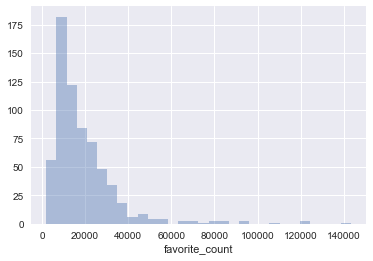

In [69]:
sns.distplot(tae['favorite_count'], kde=False,bins=30)

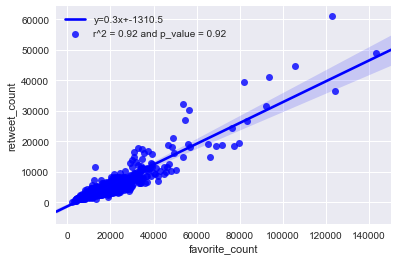

In [107]:
slope, intercept, r_value, p_value, std_err = stats.linregress(tae['favorite_count'],tae['retweet_count'])

# use line_kws to set line label for legend
ax = sns.regplot(x='favorite_count', y='retweet_count', data=tae, color='b',
                 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)},
                label = "r^2 = {0:.2f} and p_value = {0:.2f}".format(r_value, p_value))
ax.legend()

In [109]:
tae['stages_of_dog'].value_counts()

doggo             46
pupper            39
puppo             17
floofer            3
doggo & pupper     2
Name: stages_of_dog, dtype: int64

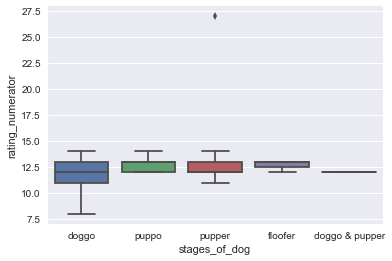

In [110]:
sns.boxplot(x='stages_of_dog', y = 'rating_numerator', data = tae[tae['stages_of_dog'].notnull()])

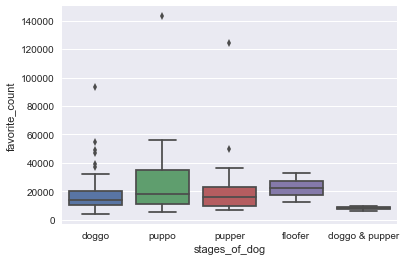

In [112]:
sns.boxplot(x='stages_of_dog', y = 'favorite_count', data = tae[tae['stages_of_dog'].notnull()])

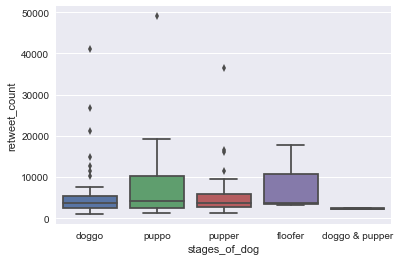

In [113]:
sns.boxplot(x='stages_of_dog', y = 'retweet_count', data = tae[tae['stages_of_dog'].notnull()])

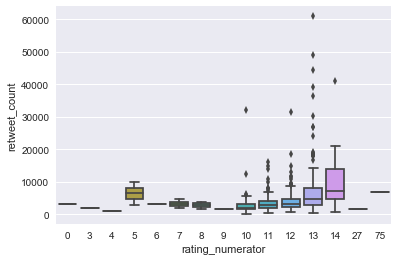

In [115]:
sns.boxplot(x='rating_numerator', y = 'retweet_count', data = tae)

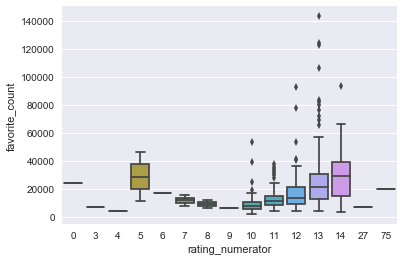

In [116]:
sns.boxplot(x='rating_numerator', y = 'favorite_count', data = tae)